In [3]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

# 16px - RGB

## Neural

In [4]:
driver = Img_Driver()

X = driver.pixels_rgb(16, rgb=True, divider=255)
Y = driver.define_y(16, rgb=True)

X_test = driver.pixels_rgb(16, rgb=True, divider=255, test=True)
Y_test = driver.define_y(16, rgb=True, test=True)

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:10])
print()

print(f"X_test : {len(X_test)} {len(X_test[0])}")
print(X_test[0:1])
print()
print(f"Y_test : {len(Y_test)}")
print(Y[0:10])

X : 2164 768
[[0.8941176470588236, 0.9254901960784314, 0.9647058823529412, 0.8117647058823529, 0.8392156862745098, 0.8666666666666667, 0.6549019607843137, 0.6666666666666666, 0.6705882352941176, 0.6666666666666666, 0.6666666666666666, 0.6705882352941176, 0.6509803921568628, 0.6509803921568628, 0.6549019607843137, 0.6078431372549019, 0.611764705882353, 0.615686274509804, 0.615686274509804, 0.6196078431372549, 0.6235294117647059, 0.615686274509804, 0.615686274509804, 0.6196078431372549, 0.6039215686274509, 0.6, 0.6039215686274509, 0.5725490196078431, 0.5764705882352941, 0.5803921568627451, 0.596078431372549, 0.596078431372549, 0.596078431372549, 0.6078431372549019, 0.615686274509804, 0.615686274509804, 0.592156862745098, 0.6, 0.6, 0.7490196078431373, 0.7647058823529411, 0.7725490196078432, 0.9137254901960784, 0.9372549019607843, 0.9450980392156862, 0.9529411764705882, 0.9686274509803922, 0.984313725490196, 0.8, 0.8196078431372549, 0.8470588235294118, 0.40784313725490196, 0.40392156862745

1661952
[1.0, 1.0, -1.0]

603.3310117721558
[0] [loss : 0.66666667] [idx: 1299] [predict: [1.0, 1.0, 1.0]] [Y: [0, 1, 0]]




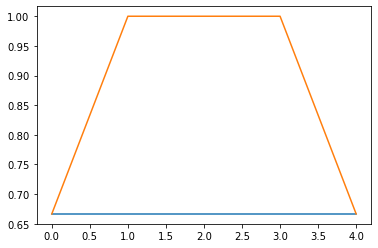

In [5]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 3
input_count = 768
hidden_count = 2304
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print()

for _ in range(5):
    r.train_nn(nn, XF, YF, 5, 0.003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%5 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
        t2 = time.time()
        print(t2 - t1)
        print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 161103)
r.release_nn(nn)

## Linear

## Radial